In [60]:
# Import dependencies:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Read csv file and store into dataframe:

complete_df = pd.read_csv("../Resources/athlete_events.csv")
complete_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


complete_df

In [67]:
#cleanup by ht_wt .. there is no cleaner way 

cleaned_up_ht_wt = complete_df.dropna(subset= ["Height", "Weight",  "Medal"] )
cleaned_up_ht_wt


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
271082,135554,Bogusaw Zych,M,28.0,182.0,82.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze


In [68]:
my_ht_cut_ratios = [ 0, 150 ,165, 180,195, 240 ]
my_ht_bin = (cleaned_up_ht_wt, my_ht_cut_ratios)
my_ht_bin

(            ID                                 Name Sex   Age  Height  Weight  \
 40          16             Juhamatti Tapio Aaltonen   M  28.0   184.0    85.0   
 41          17              Paavo Johannes Aaltonen   M  28.0   175.0    64.0   
 42          17              Paavo Johannes Aaltonen   M  28.0   175.0    64.0   
 44          17              Paavo Johannes Aaltonen   M  28.0   175.0    64.0   
 48          17              Paavo Johannes Aaltonen   M  28.0   175.0    64.0   
 ...        ...                                  ...  ..   ...     ...     ...   
 271078  135553  Galina Ivanovna Zybina (-Fyodorova)   F  25.0   168.0    80.0   
 271080  135553  Galina Ivanovna Zybina (-Fyodorova)   F  33.0   168.0    80.0   
 271082  135554                         Bogusaw Zych   M  28.0   182.0    82.0   
 271102  135563            Olesya Nikolayevna Zykina   F  19.0   171.0    64.0   
 271103  135563            Olesya Nikolayevna Zykina   F  23.0   171.0    64.0   
 
              

In [33]:
ht_medal  = cleaned_up_ht_wt [["Height" , "Medal"]]
ht_medal

,Height,Medal
40,184.0,Bronze
41,175.0,Bronze
42,175.0,Gold
44,175.0,Gold
48,175.0,Gold
...,...,...
271078,168.0,Silver
271080,168.0,Bronze
271082,182.0,Bronze
271102,171.0,Bronze


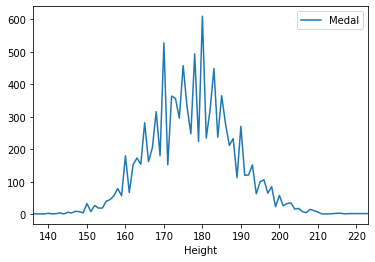

In [102]:
bronze_list_ht = ht_medal[ht_medal['Medal'] == 'Bronze']
#column_names = ["Medal", "Height"]
#reverse_list_bronze = pd.DataFrame(columns = column_names)
#reverse_list_bronze[["Medal", "Height"]] =  bronze_list_ht[["Height","Medal"]]
#bronze_list_cut = pd.cut(bronze_list_ht["Height"], my_ht_cut_ratios)
#bronze_list_cut

ht_medal_count  = bronze_list_ht.groupby(['Height']).count()
ht_medal_count.plot()
#my_list = bronze_list_cut["Height"]
#my_list
#plt.scatter(bronze_list_cut.index, bronze_list_cut)
#plt.show()
#bronze_list_cut.scatter()

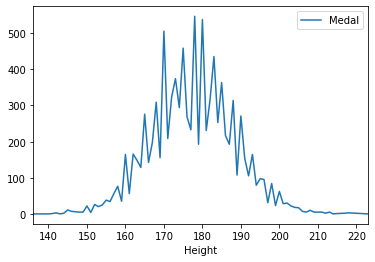

In [103]:
silver_list_ht = ht_medal[ht_medal['Medal'] == 'Silver']
ht_medal_count  = silver_list_ht.groupby(['Height']).count()
ht_medal_count.plot()

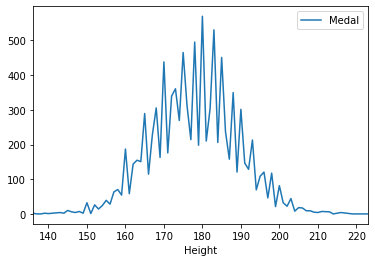

In [104]:
gold_list_ht = ht_medal[ht_medal['Medal'] == 'Gold']
ht_medal_count  = gold_list_ht.groupby(['Height']).count()
ht_medal_count.plot()

In [47]:
wt_medal  = cleaned_up_ht_wt [["Weight" , "Medal"]]
wt_medal

,Weight,Medal
40,85.0,Bronze
41,64.0,Bronze
42,64.0,Gold
44,64.0,Gold
48,64.0,Gold
...,...,...
271078,80.0,Silver
271080,80.0,Bronze
271082,82.0,Bronze
271102,64.0,Bronze


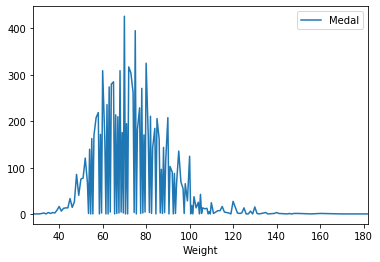

In [106]:
bronze_list_wt = wt_medal[wt_medal['Medal'] == 'Bronze']
wt_medal_count  = bronze_list_wt.groupby(['Weight']).count()
wt_medal_count.plot()

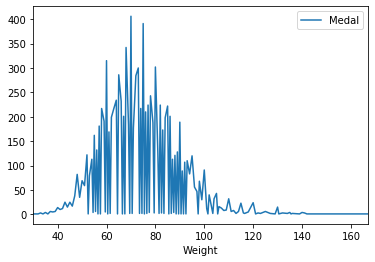

In [107]:
silver_list_wt = wt_medal[wt_medal['Medal'] == 'Silver']
wt_medal_count  = silver_list_wt.groupby(['Weight']).count()
wt_medal_count.plot()


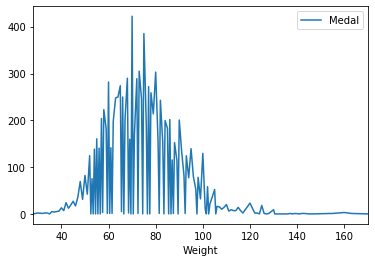

In [108]:
gold_list_wt = wt_medal[wt_medal['Medal'] == 'Gold']
wt_medal_count  = gold_list_wt.groupby(['Weight']).count()
wt_medal_count.plot()

In [54]:
bmi_medal = cleaned_up_ht_wt[["Height", "Weight", "Medal", "Sport"]]
bmi_medal

,Height,Weight,Medal,Sport
40,184.0,85.0,Bronze,Ice Hockey
41,175.0,64.0,Bronze,Gymnastics
42,175.0,64.0,Gold,Gymnastics
44,175.0,64.0,Gold,Gymnastics
48,175.0,64.0,Gold,Gymnastics
...,...,...,...,...
271078,168.0,80.0,Silver,Athletics
271080,168.0,80.0,Bronze,Athletics
271082,182.0,82.0,Bronze,Fencing
271102,171.0,64.0,Bronze,Athletics


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


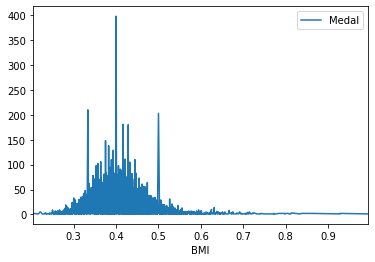

In [109]:
bmi_medal["BMI"] = bmi_medal["Weight"] / bmi_medal["Height"]
bmi_medal_rating = bmi_medal[["BMI","Medal"]]
bmi_medal_rating
wt_medal_count  = bmi_medal_rating.groupby(['BMI']).count()
wt_medal_count.plot()

In [ ]:
#see theres a correaltion between sport type and BMI 
